<a href="https://colab.research.google.com/github/teddcp/Machine-Learning-/blob/master/Regression_Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question
=============================

Write a python script  BEST FIT LINE - Calling SKlearn **linear regression**
 
1. Download the MPG data file from UCI Machine Learning [repository](https://archive.ics.uci.edu/ml/machine-learningdatabases/auto-mpg/)   

2. Identify target variable and independent variable. 

3. Prepare the data file 


           
    Univariate Regression 

1. Import relevant python libraries and sklearn linear_model  

2. Split the file into train [80%] and test [20%] data 

3. Apply linear regression 

4. Train the model using the training sets  

5. Display the coefficients coef, intercept and residues 

6. Predict using test data  

7. Perform Accuracy check using the R Square 

8. Display using scatter plot the data points and the best fit line  



    Multi-variate Regression 
    
1. Repeat the above steps  


    BEST FIT LINE - Cost function using un-constrained method - Gradient descent 

1. Use the downloaded data 
2. Convert this data to array 
3. Define the learning rate and no. of iterations as 0.0001 and 1000 respectively along with y-intercept and slope 
4. Create the functions to get the BEST FIT line 

1. Compute error for the line given the points 
2. Step gradient function 
3. Gradient descent 

5. Display using scatter plot the data points and the best fit line 
6. Display the Gradient and y-intercept value in the form y = mx+c   
7. Find the BEST FIT line i.e., m and c of y=mx+c with least error using trial and error method i.e., modify learning rate or iterations or both 

# **Answer-1** - Linear Regression



1. the *traget varibale is **mpg** and independent variable are the rests*.


## 1. Loading the libraries and CSV
-----------------------------------------------

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [2]:
from google.colab import files
csv=files.upload()

In [3]:
#loading the data
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
data= pd.read_csv('/content/auto-mpg.data', delim_whitespace=True, names=column_names)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
data.tail(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


## 2. Analyzing the csv data
--------------------------------------

In [5]:
data.info() # Ignoring the name column , 1 object column is there and rest are integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
# Even though horsepower values are numeric , it is set to object , that means we need to check is there is any string
data.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [8]:
 # ? is present , we need to fill with NaN 
data.replace('?',np.NaN,inplace=True)
data.horsepower= data.horsepower.astype('float')
data.horsepower.mean()

104.46938775510205

In [9]:
data.horsepower.fillna(data.horsepower.mean(),inplace=True)
data.horsepower.isna().any()

False

## Univariate Regression

we need to find out the most **`imporant predictor for the mpg`**

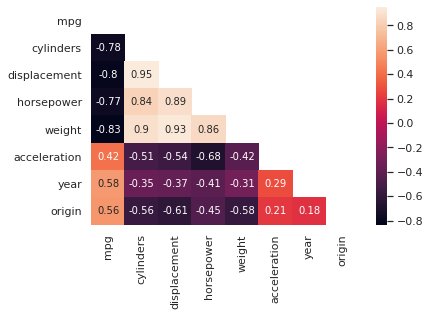

In [10]:
matrix=np.triu(data.corr())
sns.heatmap(data.corr(),annot=True,mask=matrix)

1. so from the corelation matrix, we found that **`year is the maxium corelation with mpg`**

## Data splitting

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
x=data[['year']]
y=data['mpg']

In [0]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)

## Applying Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression as lr

In [0]:
model=lr(fit_intercept=True)

In [16]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#getting coefficients and intercepts
model.coef_, model.intercept_

(array([1.29141847]), -74.67364292574689)

So the *** equation is*** :

     y= 1.29 * year + (-74.67)

where  intercept is `-74.67` and coefficient is `1.29`

In [0]:
#predicting
pred=model.predict(x_test)

## checking the accuracy and plotting the result

In [0]:
from sklearn.metrics import r2_score 

In [20]:
r2_score(y_test,pred)  # r2 score is 0.28 which is pretty bad

0.28727386919989206

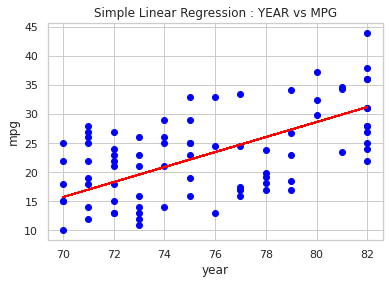

In [21]:
plt.figure()
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,pred,color='red')
plt.xlabel('year')
plt.ylabel('mpg')
plt.title('Simple Linear Regression : YEAR vs MPG')
plt.show()

# Anser-2 - Multivariate Regression
----------------------------------------------

In [22]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [0]:
cols=['year','origin','acceleration','horsepower','cylinders','weight','displacement']

In [24]:
x_test.shape,y_test.shape

((80, 1), (80,))

## Feature Selection : Forward selection

In [25]:
y=data['mpg']
model=lr(fit_intercept=True)
n=80
res=[]

for idx,col in enumerate(cols):
  new_cols=cols[:idx+1]
  x=data.loc[:,new_cols]
  
  x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)
  
  # getting the num of indepenet features
  p=x_test.shape[1]
  
  #training and predicting
  model.fit(x_train,y_train)
  pred=model.predict(x_test)
  
  # r squared value
  sc1=r2_score(y_test,pred) 

  #Adjusted R squared 1- (1- rsquare)*(n-1 / n-p-1 )
  sc2= 1 - (1- sc1)*( (n-1) / (n-p-1) )

  res.append((idx,sc1,sc2))


df=pd.DataFrame(res,columns=['index','r-squared','Adj_r-squared'])
df

,index,r-squared,Adj_r-squared
0,0,0.287274,0.278136
1,1,0.556738,0.545225
2,2,0.635736,0.621357
3,3,0.771979,0.759818
4,4,0.802993,0.789682
5,5,0.838926,0.825687
6,6,0.847573,0.832754


## preparing the model

1. So, from the above table, we can **conclude that the adjusted r-squared and r-squared are increasing if we use all the variables**.

2. thus we will use **all the columns** to create the model.

In [0]:
x=data.loc[:,cols]
y=data['mpg']
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)

In [27]:
model=lr(fit_intercept=True)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
model.coef_, model.intercept_   # all the coefficients and intercepts

(array([ 0.79647938,  1.31331307,  0.07488864, -0.01179845, -0.15417994,
        -0.00677523,  0.01399743]), -20.782175730118432)

In [0]:
pred=model.predict(x_test)

In [30]:
r2_score(y_test,pred)   # 84% accuracy is achieved now.

0.8475731044779412

**Note**

From **Simple Linear Regression (univariate) to Multivariate Linear Regression**, we have improved the accuracy **`from 28% to 84%`**.

# Answer 3- Using Gradient Descent
----------------------------------------

In [224]:
cols=['year','origin','acceleration','horsepower','cylinders','weight','displacement']
x=data[cols]
y=data['mpg']
x.shape

(398, 7)

In [0]:
#we need to Standardize
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [0]:
# adding the bias column of ones
ones = np.ones([x.shape[0],1])
x = np.concatenate((ones,x),axis=1)

In [0]:
# Regression model using Gradient Descent
class My_regression(object):

  def __init__(self,row_size, feature_size,alpha=0.1,iters=1000):
    
    # Initial Coefficients
    self.row_size,self.feature_size= row_size, feature_size
    self.B = np.zeros(self.feature_size)

    #set hyper parameters
    self.alpha = alpha
    self.iters = iters

  # #compute the cost function
  def cost_function(self,X, Y):
    m = self.row_size
    J = np.sum((X.dot(self.B)-Y) ** 2)/(2 * m)
    return J

  # -------------------------------
  # Gradient descent
  # -------------------------------

  def fit(self,X, Y):

    cost_history = [0] * self.iters

    for iteration in range(self.iters):
      if  not (iteration % 500) :
        print(iteration)
   
      # Hypothesis Values
      h = X.dot(self.B)
 
      # Difference b/w Hypothesis and Actual Y
      loss= h-Y
   
      # Gradient Calculation
      gradient = X.T.dot(loss) / self.row_size
 
      # Changing Values of B using Gradient
      self.B = self.B - self.alpha * gradient 
 
      # New Cost Value
      cost = self.cost_function(X, Y)
      cost_history[iteration] = cost
    
    return self.B, cost_history

  # Prediciting 
  def predict(self,X):
    return np.dot(X,self.B)

  # r2-score 
  def r2_score(self,y_,y):
    # sum of square of  totals
    sst = np.sum((y-y.mean())**2)
 
    # sum of square residuals
    ssr = np.sum((y_-y)**2)
  
    # r2-score
    r2 = 1-(ssr/sst)

    return r2

In [0]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test= tts(x,y,test_size=0.3,random_state= 42)

In [230]:
x_train.shape,x_test.shape

((278, 8), (120, 8))

In [267]:
# creating the object of my regression class
model=My_regression(x_train.shape[0],x_train.shape[1],0.01,1000)

# fitting the model
newB,costs=model.fit(x_train,y_train)

0
500


In [268]:
print(newB)
print('\n',costs)

[23.47110699  2.74846214  1.1897075  -0.26717343 -1.10549102 -0.27488297
 -3.36656199 -0.57242311]

 [298.70180975456765, 291.5723733519718, 284.6968103729203, 278.0606006392924, 271.65031385976283, 265.4535201509634, 259.45870807806915, 253.65520957932475, 248.03313119280347, 242.58329105291676, 237.2971611692544, 232.16681454157853, 227.18487670254834, 222.3444813143113, 217.63922947672722, 213.06315243394727, 208.61067739257373, 204.27659618888603, 200.05603656482492, 195.94443583275464, 191.93751672762866, 188.0312652622156, 184.22191041663245, 180.50590550770286, 176.87991109671955, 173.34077930614825, 169.88553942675424, 166.51138470665273, 163.21566022295318, 159.99585174506382, 156.84957550640667, 153.7745688083261, 150.76868138641447, 147.82986747537058, 144.95617851390307, 142.1457564361295, 139.39682750044088, 136.7076966109429, 134.07674209037026, 131.50241086684014, 128.98321403998457, 126.51772279490723, 124.10456463507077, 121.74241990765562, 119.43001859716014, 117.1661

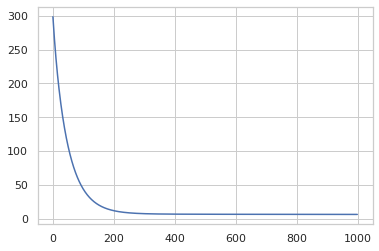

In [269]:
plt.plot(list(range(model.iters)),costs)

In [0]:
# Testing the model
res = model.predict(x_test)

In [273]:
round(model.r2_score(res,y_test),2) # 83% Accuracy 

0.83

## Conclusion
------------------------------------------------------------

1. So the coefficeints are 

```
[23.47110699  2.74846214  1.1897075  -0.26717343 -1.10549102 -0.27488297
 -3.36656199 -0.57242311]

  Thus the equation is -

  MPG = 23.47  + year*2.74  + origin*1.19  + acceleration *(-0.27) + 
       horsepower*(-1.11) +  cylinders *(-0.27) +   weight*(-3.37)  + 
       displacement*(-0.57)

```

2. We are able to achieve **83% accuracy** using ***Gradient Descent method in Multivariate Linear regression.***

In [0]:
Assignment -3c-1